In [10]:
import requests
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import pandas as pd

load_dotenv() 

True

In [19]:
authToken = os.getenv('API_TOKEN')
myZoneCode = 'DE'

class QueryElecMapsAPI:

    def __init__(self, authToken):
        self.authToken = authToken

    def requestAvailableZones(self):
        url = 'https://api.electricitymap.org/v3/zones'
        headers = {'auth-token': self.authToken}
        self.availzones=requests.get(url, params=headers).json()

    def requestCarbonIntensityHistory(self, zoneCode):
        url = 'https://api.electricitymap.org/v3/carbon-intensity/history?zone=' + zoneCode
        headers = {'auth-token': self.authToken}
        dict = requests.get(url, params=headers).json()
        return dict['history']
    
    def requestPowerBreakdownHistory(self, zoneCode):
        url = 'https://api.electricitymap.org/v3/power-breakdown/history?zone=' + zoneCode
        headers = {'auth-token': self.authToken}
        dict = requests.get(url, params=headers).json()
        return dict['history']

## Get all available Zones

In [69]:
myQueryElecMaps = QueryElecMapsAPI(authToken)
myQueryElecMaps.requestAvailableZones()

print(myQueryElecMaps.availzones)

{'AD': {'zoneName': 'Andorra'}, 'AE': {'zoneName': 'United Arab Emirates'}, 'AF': {'zoneName': 'Afghanistan'}, 'AG': {'zoneName': 'Antigua and Barbuda'}, 'AL': {'zoneName': 'Albania'}, 'AM': {'zoneName': 'Armenia'}, 'AO': {'zoneName': 'Angola'}, 'AR': {'zoneName': 'Argentina'}, 'AT': {'zoneName': 'Austria'}, 'AU': {'zoneName': 'Australia'}, 'AU-LH': {'countryName': 'Australia', 'zoneName': 'Lord Howe Island'}, 'AU-NSW': {'countryName': 'Australia', 'zoneName': 'New South Wales'}, 'AU-NT': {'countryName': 'Australia', 'zoneName': 'Northern Territory'}, 'AU-QLD': {'countryName': 'Australia', 'zoneName': 'Queensland'}, 'AU-SA': {'countryName': 'Australia', 'zoneName': 'South Australia'}, 'AU-TAS': {'countryName': 'Australia', 'zoneName': 'Tasmania'}, 'AU-TAS-CBI': {'countryName': 'Australia', 'zoneName': 'Cape Barren Island'}, 'AU-TAS-FI': {'countryName': 'Australia', 'zoneName': 'Flinders Island'}, 'AU-TAS-KI': {'countryName': 'Australia', 'zoneName': 'King Island'}, 'AU-VIC': {'countryN

In [15]:
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(myQueryElecMaps.availzones)

{'AD': {'zoneName': 'Andorra'},
 'AE': {'zoneName': 'United Arab Emirates'},
 'AF': {'zoneName': 'Afghanistan'},
 'AG': {'zoneName': 'Antigua and Barbuda'},
 'AL': {'zoneName': 'Albania'},
 'AM': {'zoneName': 'Armenia'},
 'AO': {'zoneName': 'Angola'},
 'AR': {'zoneName': 'Argentina'},
 'AT': {'zoneName': 'Austria'},
 'AU': {'zoneName': 'Australia'},
 'AU-LH': {'countryName': 'Australia', 'zoneName': 'Lord Howe Island'},
 'AU-NSW': {'countryName': 'Australia', 'zoneName': 'New South Wales'},
 'AU-NT': {'countryName': 'Australia', 'zoneName': 'Northern Territory'},
 'AU-QLD': {'countryName': 'Australia', 'zoneName': 'Queensland'},
 'AU-SA': {'countryName': 'Australia', 'zoneName': 'South Australia'},
 'AU-TAS': {'countryName': 'Australia', 'zoneName': 'Tasmania'},
 'AU-TAS-CBI': {'countryName': 'Australia', 'zoneName': 'Cape Barren Island'},
 'AU-TAS-FI': {'countryName': 'Australia', 'zoneName': 'Flinders Island'},
 'AU-TAS-KI': {'countryName': 'Australia', 'zoneName': 'King Island'},
 '

In [ ]:
print(len(myQueryElecMaps.availzones))

400


In [ ]:
germany_zone_codes = [(c,val) for c,val in myQueryElecMaps.availzones.items() if 'Germany' in val.values()]
print(germany_zone_codes)

#only one Germany zone

[('DE', {'zoneName': 'Germany'})]


In [24]:
australia_zone_codes = [(c,val) for c,val in myQueryElecMaps.availzones.items() if 'Australia' in val.values()]
pp.pprint(australia_zone_codes)

[('AU', {'zoneName': 'Australia'}),
 ('AU-LH', {'countryName': 'Australia', 'zoneName': 'Lord Howe Island'}),
 ('AU-NSW', {'countryName': 'Australia', 'zoneName': 'New South Wales'}),
 ('AU-NT', {'countryName': 'Australia', 'zoneName': 'Northern Territory'}),
 ('AU-QLD', {'countryName': 'Australia', 'zoneName': 'Queensland'}),
 ('AU-SA', {'countryName': 'Australia', 'zoneName': 'South Australia'}),
 ('AU-TAS', {'countryName': 'Australia', 'zoneName': 'Tasmania'}),
 ('AU-TAS-CBI', {'countryName': 'Australia', 'zoneName': 'Cape Barren Island'}),
 ('AU-TAS-FI', {'countryName': 'Australia', 'zoneName': 'Flinders Island'}),
 ('AU-TAS-KI', {'countryName': 'Australia', 'zoneName': 'King Island'}),
 ('AU-VIC', {'countryName': 'Australia', 'zoneName': 'Victoria'}),
 ('AU-WA', {'countryName': 'Australia', 'zoneName': 'Western Australia'}),
 ('AU-WA-RI', {'countryName': 'Australia', 'zoneName': 'Rottnest Island'})]


## Get Germany Carbon Intensity History

In [72]:
germanyCarbonIntensityHistory=myQueryElecMaps.requestCarbonIntensityHistory(myZoneCode)

In [73]:
pp.pprint(germanyCarbonIntensityHistory)

[{'carbonIntensity': 405,
  'createdAt': '2024-12-30T13:45:49.964Z',
  'datetime': '2025-01-02T13:00:00.000Z',
  'emissionFactorType': 'lifecycle',
  'estimationMethod': None,
  'isEstimated': False,
  'updatedAt': '2025-01-03T08:47:06.137Z',
  'zone': 'DE'},
 {'carbonIntensity': 410,
  'createdAt': '2024-12-30T14:46:36.618Z',
  'datetime': '2025-01-02T14:00:00.000Z',
  'emissionFactorType': 'lifecycle',
  'estimationMethod': None,
  'isEstimated': False,
  'updatedAt': '2025-01-03T08:47:26.443Z',
  'zone': 'DE'},
 {'carbonIntensity': 408,
  'createdAt': '2024-12-30T15:46:44.408Z',
  'datetime': '2025-01-02T15:00:00.000Z',
  'emissionFactorType': 'lifecycle',
  'estimationMethod': None,
  'isEstimated': False,
  'updatedAt': '2025-01-03T10:47:09.771Z',
  'zone': 'DE'},
 {'carbonIntensity': 403,
  'createdAt': '2024-12-30T16:47:51.966Z',
  'datetime': '2025-01-02T16:00:00.000Z',
  'emissionFactorType': 'lifecycle',
  'estimationMethod': None,
  'isEstimated': False,
  'updatedAt': '2025

### Convert nested dict into pandas dataframe

In [74]:
print(len(germanyCarbonIntensityHistory))

24


In [75]:
df = pd.DataFrame(germanyCarbonIntensityHistory)
print(df.head())

  zone  carbonIntensity                  datetime                 updatedAt  \
0   DE              405  2025-01-02T13:00:00.000Z  2025-01-03T08:47:06.137Z   
1   DE              410  2025-01-02T14:00:00.000Z  2025-01-03T08:47:26.443Z   
2   DE              408  2025-01-02T15:00:00.000Z  2025-01-03T10:47:09.771Z   
3   DE              403  2025-01-02T16:00:00.000Z  2025-01-03T10:47:09.771Z   
4   DE              409  2025-01-02T17:00:00.000Z  2025-01-03T10:46:54.415Z   

                  createdAt emissionFactorType  isEstimated estimationMethod  
0  2024-12-30T13:45:49.964Z          lifecycle        False             None  
1  2024-12-30T14:46:36.618Z          lifecycle        False             None  
2  2024-12-30T15:46:44.408Z          lifecycle        False             None  
3  2024-12-30T16:47:51.966Z          lifecycle        False             None  
4  2024-12-30T17:47:17.749Z          lifecycle        False             None  


In [76]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S.%fZ')
print(df['datetime'])

0    2025-01-02 13:00:00
1    2025-01-02 14:00:00
2    2025-01-02 15:00:00
3    2025-01-02 16:00:00
4    2025-01-02 17:00:00
5    2025-01-02 18:00:00
6    2025-01-02 19:00:00
7    2025-01-02 20:00:00
8    2025-01-02 21:00:00
9    2025-01-02 22:00:00
10   2025-01-02 23:00:00
11   2025-01-03 00:00:00
12   2025-01-03 01:00:00
13   2025-01-03 02:00:00
14   2025-01-03 03:00:00
15   2025-01-03 04:00:00
16   2025-01-03 05:00:00
17   2025-01-03 06:00:00
18   2025-01-03 07:00:00
19   2025-01-03 08:00:00
20   2025-01-03 09:00:00
21   2025-01-03 10:00:00
22   2025-01-03 11:00:00
23   2025-01-03 12:00:00
Name: datetime, dtype: datetime64[ns]


Text(0.5, 1.0, 'Zone: DE')

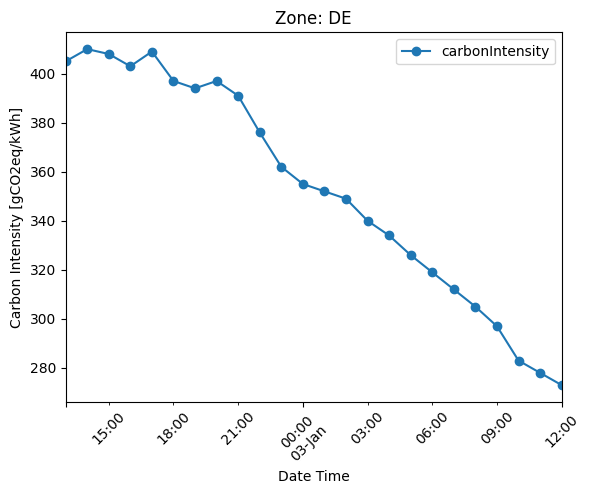

In [77]:
ax = df.plot(x='datetime',y='carbonIntensity', marker = 'o', rot=45)
ax.set_ylabel('Carbon Intensity [gCO2eq/kWh]')
ax.set_xlabel('Date Time')
ax.set_title('Zone: DE')

### Plot Germany Carbon Intensity as timeseries

### Repeat for Australia Queensland Zone

In [16]:
myQueryElecMaps = QueryElecMapsAPI(authToken)
myQueryElecMaps.requestCarbonIntensityHistory('AU-QLD')

[{'zone': 'AU-QLD',
  'carbonIntensity': 726,
  'datetime': '2025-01-03T19:00:00.000Z',
  'updatedAt': '2025-01-03T20:47:31.604Z',
  'createdAt': '2024-12-31T19:46:14.531Z',
  'emissionFactorType': 'lifecycle',
  'isEstimated': False,
  'estimationMethod': None},
 {'zone': 'AU-QLD',
  'carbonIntensity': 588,
  'datetime': '2025-01-03T20:00:00.000Z',
  'updatedAt': '2025-01-03T21:46:31.449Z',
  'createdAt': '2024-12-31T20:45:34.039Z',
  'emissionFactorType': 'lifecycle',
  'isEstimated': False,
  'estimationMethod': None},
 {'zone': 'AU-QLD',
  'carbonIntensity': 452,
  'datetime': '2025-01-03T21:00:00.000Z',
  'updatedAt': '2025-01-03T22:50:13.536Z',
  'createdAt': '2024-12-31T21:45:46.606Z',
  'emissionFactorType': 'lifecycle',
  'isEstimated': False,
  'estimationMethod': None},
 {'zone': 'AU-QLD',
  'carbonIntensity': 403,
  'datetime': '2025-01-03T22:00:00.000Z',
  'updatedAt': '2025-01-03T23:46:40.128Z',
  'createdAt': '2024-12-31T22:44:27.588Z',
  'emissionFactorType': 'lifecycle

# Power Breakdown 

In [20]:
myQueryElecMaps = QueryElecMapsAPI(authToken)
germanyPowerBreakdownHistory = myQueryElecMaps.requestPowerBreakdownHistory('DE')

In [22]:
len(germanyPowerBreakdownHistory)

24

## Plot Power breakdown as stacked line graph

In [35]:
powerbreakdownhistorydf = pd.DataFrame(germanyPowerBreakdownHistory)
powerbreakdownhistorydf['datetime'] = pd.to_datetime(powerbreakdownhistorydf['datetime'], format='%Y-%m-%dT%H:%M:%S.%fZ')
powerbreakdownhistorydf.head()

,zone,datetime,updatedAt,createdAt,powerConsumptionBreakdown,powerProductionBreakdown,powerImportBreakdown,powerExportBreakdown,fossilFreePercentage,renewablePercentage,powerConsumptionTotal,powerProductionTotal,powerImportTotal,powerExportTotal,isEstimated,estimationMethod
0,DE,2025-01-03 19:00:00,2025-01-04T00:47:16.119Z,2024-12-31T19:46:29.490Z,"{'nuclear': 133, 'geothermal': 22, 'biomass': ...","{'nuclear': None, 'geothermal': 27, 'biomass':...","{'AT': 0, 'BE': 0, 'CH': 0, 'CZ': 0, 'FR': 0, ...","{'AT': 1776, 'BE': 1000, 'CH': 2429, 'CZ': 835...",62,62,53385,62733,2350,11697,False,None
1,DE,2025-01-03 20:00:00,2025-01-04T00:47:16.119Z,2024-12-31T20:45:34.039Z,"{'nuclear': 147, 'geothermal': 22, 'biomass': ...","{'nuclear': None, 'geothermal': 27, 'biomass':...","{'AT': 0, 'BE': 0, 'CH': 0, 'CZ': 0, 'FR': 0, ...","{'AT': 2126, 'BE': 997, 'CH': 2991, 'CZ': 628,...",61,61,51421,61878,2306,12437,False,None
2,DE,2025-01-03 21:00:00,2025-01-04T00:47:16.119Z,2024-12-31T21:45:46.606Z,"{'nuclear': 152, 'geothermal': 21, 'biomass': ...","{'nuclear': None, 'geothermal': 27, 'biomass':...","{'AT': 0, 'BE': 0, 'CH': 0, 'CZ': 0, 'FR': 0, ...","{'AT': 2067, 'BE': 996, 'CH': 3012, 'CZ': 367,...",61,60,49037,59487,2323,12374,False,None
3,DE,2025-01-03 22:00:00,2025-01-04T01:47:11.439Z,2024-12-31T22:44:27.588Z,"{'nuclear': 156, 'geothermal': 21, 'biomass': ...","{'nuclear': None, 'geothermal': 27, 'biomass':...","{'AT': 0, 'BE': 0, 'CH': 0, 'CZ': 0, 'FR': 0, ...","{'AT': 1850, 'BE': 1000, 'CH': 3089, 'CZ': 2, ...",60,60,46729,56950,2330,11926,False,None
4,DE,2025-01-03 23:00:00,2025-01-04T07:46:46.012Z,2024-12-31T23:46:37.884Z,"{'nuclear': 196, 'geothermal': 21, 'biomass': ...","{'nuclear': None, 'geothermal': 27, 'biomass':...","{'AT': 0, 'BE': 0, 'CH': 0, 'CZ': 127, 'FR': 0...","{'AT': 1790, 'BE': 928, 'CH': 2801, 'CZ': 0, '...",61,60,44075,53472,2388,11362,False,None


In [52]:
powerConsumptionBreakdowndf = pd.json_normalize(powerbreakdownhistorydf['powerConsumptionBreakdown'])
powerConsumptionBreakdowndf['datetime'] = powerbreakdownhistorydf['datetime'].values
powerConsumptionBreakdowndf.set_index('datetime')
powerConsumptionBreakdowndf.head()

,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,hydro discharge,battery discharge,datetime
0,133,22,3925,12016,26676,0,1912,7589,312,251,548,0,2025-01-03 19:00:00
1,147,22,3789,12390,25714,0,1852,6918,304,249,36,0,2025-01-03 20:00:00
2,152,21,3732,12226,23906,0,1887,6512,301,244,56,0,2025-01-03 21:00:00
3,156,21,3733,12350,22257,0,1897,5728,299,242,45,0,2025-01-03 22:00:00
4,196,21,3752,11518,20903,0,1817,5274,300,254,40,0,2025-01-03 23:00:00


In [53]:
powerProductionBreakdowndf = pd.json_normalize(powerbreakdownhistorydf['powerProductionBreakdown'])
powerProductionBreakdowndf['datetime'] = powerbreakdownhistorydf['datetime'].values
powerConsumptionBreakdowndf.set_index('datetime')
powerProductionBreakdowndf.head()

,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,hydro discharge,battery discharge,datetime
0,None,27,4667,14616,31840,0,1171,9248,374,246,545,None,2025-01-03 19:00:00
1,None,27,4617,15428,31421,0,1138,8622,374,251,-326,None,2025-01-03 20:00:00
2,None,27,4593,15380,29502,0,1161,8199,374,251,-400,None,2025-01-03 21:00:00
3,None,27,4614,15632,27611,0,1186,7256,374,251,-625,None,2025-01-03 22:00:00
4,None,27,4629,14503,25849,0,1163,6668,374,260,-423,None,2025-01-03 23:00:00


Text(0.5, 1.0, 'Power Production - Zone: DE')

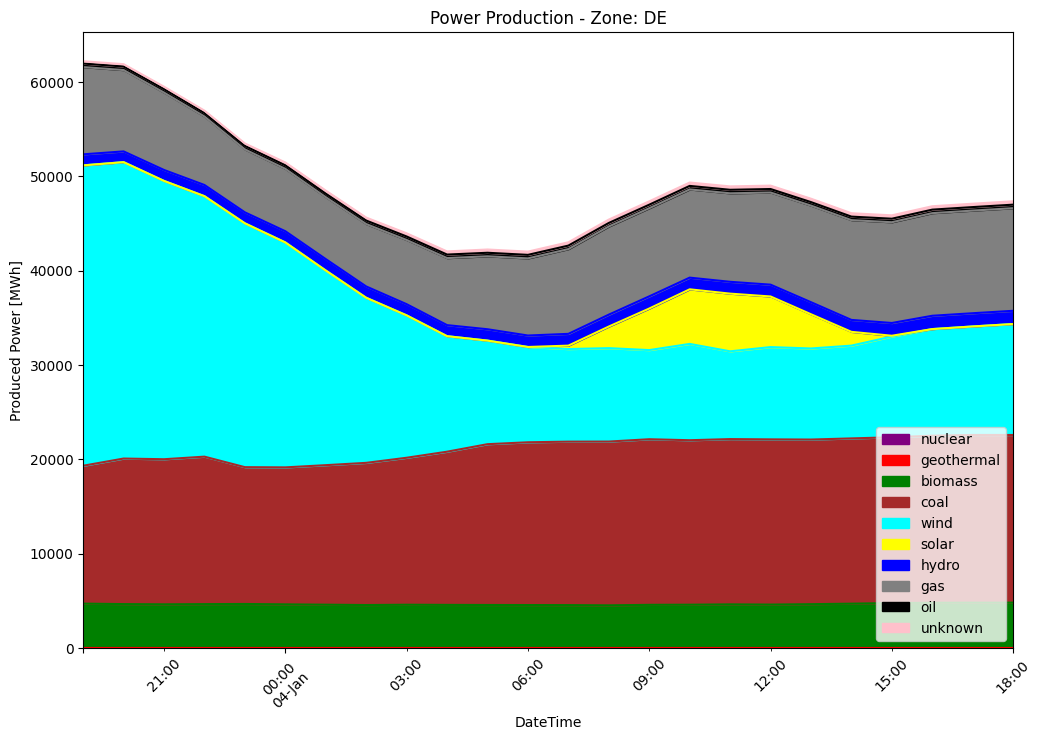

In [74]:
#can't plot hydro discharge as both positive and negative, negative may be water pumped up, same with barry discharge
ax = powerProductionBreakdowndf.plot.area(
    x='datetime',y=['nuclear','geothermal','biomass','coal','wind','solar','hydro','gas','oil','unknown'],
    figsize=(12,8),
    rot=45,
    color=('purple','red','green','brown','cyan','yellow','blue','grey','black','pink'))
ax.legend(loc='lower right')
ax.set_ylabel('Produced Power [MWh]')
ax.set_xlabel('DateTime')
ax.set_title('Power Production - Zone: DE')

Text(0.5, 1.0, 'Power Consumption - Zone: DE')

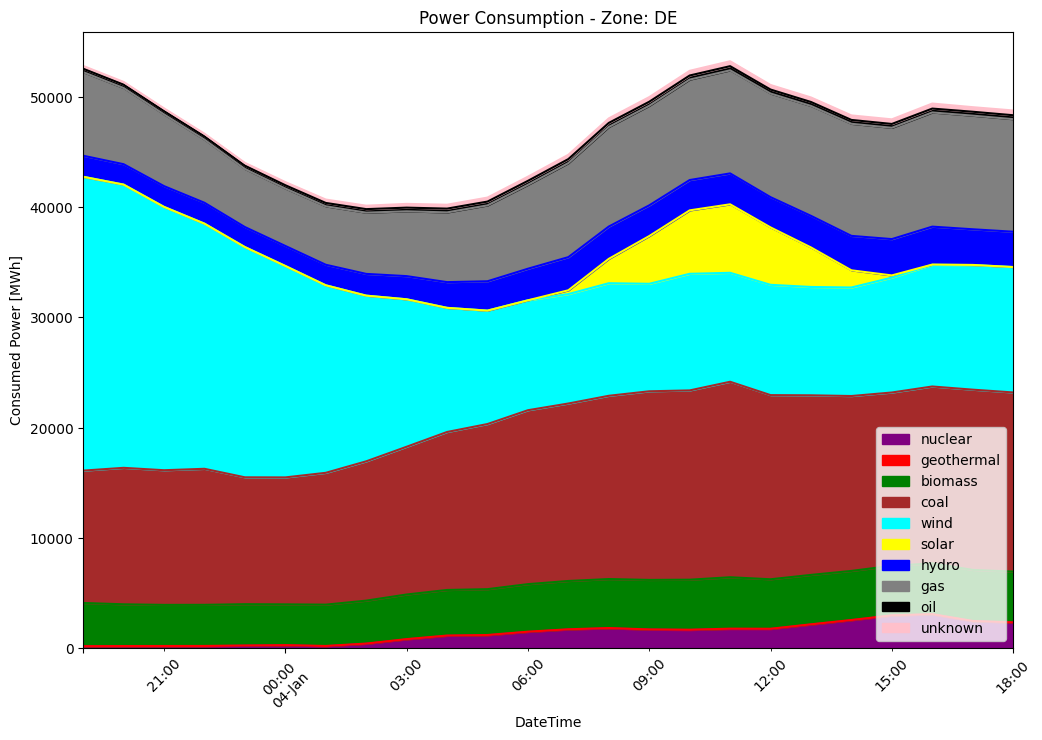

In [75]:
ax = powerConsumptionBreakdowndf.plot.area(
    x='datetime',y=['nuclear','geothermal','biomass','coal','wind','solar','hydro','gas','oil','unknown'],
    figsize=(12,8),
    rot=45,
    color=('purple','red','green','brown','cyan','yellow','blue','grey','black','pink'))
ax.legend(loc='lower right')
ax.set_ylabel('Consumed Power [MWh]')
ax.set_xlabel('DateTime')
ax.set_title('Power Consumption - Zone: DE')

###  Save dfs to csv files

In [ ]:
powerConsumptionBreakdowndf.to_csv('./data/powerConsumptionBreakdown.csv')
powerProductionBreakdowndf.to_csv('./data/powerProductionBreakdown.csv')

In [78]:
powerbreakdownhistorydf.to_csv('./data/powerBreakDownHistory.csv')

### Pull most recent power breakdown data from API
### Read in current csvs, and outer join (union) on datetime column
### Overwrite csv with new larger df

In [107]:
import datetime

def PullRecentPowerBreakdown():
    myQueryElecMaps = QueryElecMapsAPI(authToken)
    germanyPowerBreakdownHistory = myQueryElecMaps.requestPowerBreakdownHistory('DE')
    powerBreakdownHistorydf = pd.DataFrame(germanyPowerBreakdownHistory)
    powerBreakdownHistorydf['datetime'] = pd.to_datetime(powerBreakdownHistorydf['datetime'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    
    start = datetime.datetime.strftime(powerBreakdownHistorydf['datetime'][0], format='%Y-%m-%dT%H%M%S')
    end = datetime.datetime.strftime(powerBreakdownHistorydf['datetime'][len(powerBreakdownHistorydf)-1], format='%Y-%m-%dT%H%M%S')
    powerBreakdownHistorydf.to_csv(f'./data/powerBreakDownHistory_{start}_{end}.csv')

PullRecentPowerBreakdown()